# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [187]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [188]:
print(f'Shape of df_tesla: {df_tesla.shape}')
print(f'Rows: {df_tesla.shape[0]}, Columns: {df_tesla.shape[1]}')
print(f'Column names: {df_tesla.columns.tolist()}')

Shape of df_tesla: (124, 3)
Rows: 124, Columns: 3
Column names: ['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE']


In [189]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [190]:
display(df_tesla.describe())

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [191]:
print('Tesla data first 5 rows:\n')
print(df_unemployment.head())
print('\nTesla data last 5 rows:\n')
print(df_unemployment.tail())

Tesla data first 5 rows:

     MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                      34     5.7
1  2004-02                      33     5.6
2  2004-03                      25     5.8
3  2004-04                      29     5.6
4  2004-05                      23     5.6

Tesla data last 5 rows:

       MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
176  2018-09                      14     3.7
177  2018-10                      15     3.8
178  2018-11                      16     3.7
179  2018-12                      17     3.9
180  2019-01                      21     4.0


In [192]:
print(f'The periodicity of df_tesla is: Monthly')
print(f'Evidence: The MONTH column contains dates like {df_tesla["MONTH"].iloc[0]} and {df_tesla["MONTH"].iloc[1]}')
print(f'There are {df_tesla.shape[0]} rows spanning from {df_tesla["MONTH"].iloc[0]} to {df_tesla["MONTH"].iloc[-1]}')

The periodicity of df_tesla is: Monthly
Evidence: The MONTH column contains dates like 2010-06-01 and 2010-07-01
There are 124 rows spanning from 2010-06-01 to 2020-09-01


## Google Web Search Data
Google's search interest ranges between 0 and 100. But what does that mean? Google defines the values of search interest as: 

> Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

Basically, the actual search volume of a term is not publicly available. Google only offers a scaled number. Each data point is divided by the total searches of the geography and time range it represents to compare relative popularity.

For each word in your search, Google finds how much search volume in each region and time period your term had relative to all the searches in that region and time period. It then combines all of these measures into a single measure of popularity, and then it scales the values across your topics, so the largest measure is set to 100. In short: Google Trends doesn’t exactly tell you how many searches occurred for your topic, but it does give you a nice proxy.

Here are the Google Trends Search Parameters that (Angela) used to generate the .csv data:

  * "Tesla", Worldwide, Web Search

  * "Bitcoin", Worldwide, News Search

  * "Unemployment Benefits", United States, Web Search

### Unemployment Data

In [193]:
print(f'Shape of df_unemployment: {df_unemployment.shape}')
print(f'Column names: {df_unemployment.columns.tolist()}')
display(df_unemployment.describe())
print(df_unemployment.head())
print(df_unemployment.tail())

Shape of df_unemployment: (181, 3)
Column names: ['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE']


,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


     MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                      34     5.7
1  2004-02                      33     5.6
2  2004-03                      25     5.8
3  2004-04                      29     5.6
4  2004-05                      23     5.6
       MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
176  2018-09                      14     3.7
177  2018-10                      15     3.8
178  2018-11                      16     3.7
179  2018-12                      17     3.9
180  2019-01                      21     4.0


In [194]:
# cool way to break longer print statements into two lines
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [195]:
print(f'Shape of df_btc_price: {df_btc_price.shape}')
print(f'Column names: {df_btc_price.columns.tolist()}')
display(df_btc_price.describe())
# print the head so we know what type of date/numerical data we're working with
print(df_btc_price.head())
print(df_btc_price.tail())

Shape of df_btc_price: (2204, 3)
Column names: ['DATE', 'CLOSE', 'VOLUME']


,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


         DATE       CLOSE      VOLUME
0  2014-09-17  457.334015  21056800.0
1  2014-09-18  424.440002  34483200.0
2  2014-09-19  394.795990  37919700.0
3  2014-09-20  408.903992  36863600.0
4  2014-09-21  398.821014  26580100.0
            DATE         CLOSE        VOLUME
2199  2020-09-24  10745.548828  2.301754e+10
2200  2020-09-25  10702.290039  2.123255e+10
2201  2020-09-26  10754.437500  1.810501e+10
2202  2020-09-27  10774.426758  1.801688e+10
2203  2020-09-28  10912.536133  2.122653e+10


In [196]:
print(f'Shape of df_btc_search: {df_btc_search.shape}')
print(f'Column names: {df_btc_search.columns.tolist()}')
display(df_btc_search.describe())

Shape of df_btc_search: (73, 2)
Column names: ['MONTH', 'BTC_NEWS_SEARCH']


,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [197]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [198]:
print(f'Missing values for Tesla?: ')
print(f'Missing values for U/E?: ')
print(f'Missing values for BTC Search?: ')

Missing values for Tesla?: 
Missing values for U/E?: 
Missing values for BTC Search?: 


In [199]:
# Missing values summary for each dataframe (per-column and total)
print(f'Missing values for Tesla?: {df_tesla.isnull().sum().to_dict()} (total: {int(df_tesla.isnull().sum().sum())})')
print(f'Missing values for U/E?: {df_unemployment.isnull().sum().to_dict()} (total: {int(df_unemployment.isnull().sum().sum())})')
print(f'Missing values for BTC Search?: {df_btc_search.isnull().sum().to_dict()} (total: {int(df_btc_search.isnull().sum().sum())})')

Missing values for Tesla?: {'MONTH': 0, 'TSLA_WEB_SEARCH': 0, 'TSLA_USD_CLOSE': 0} (total: 0)
Missing values for U/E?: {'MONTH': 0, 'UE_BENEFITS_WEB_SEARCH': 0, 'UNRATE': 0} (total: 0)
Missing values for BTC Search?: {'MONTH': 0, 'BTC_NEWS_SEARCH': 0} (total: 0)


In [200]:
print(f'Missing values for BTC price?: {df_btc_price.isnull().sum().to_dict()} (total: {int(df_btc_price.isnull().sum().sum())})')

Missing values for BTC price?: {'DATE': 0, 'CLOSE': 1, 'VOLUME': 1} (total: 2)


In [201]:
# print row indices (0-based) that contain any missing values for each dataframe
for name, df in [('df_tesla', df_tesla),
                 ('df_unemployment', df_unemployment),
                 ('df_btc_search', df_btc_search),
                 ('df_btc_price', df_btc_price)]:
    missing_idx = df[df.isnull().any(axis=1)].index.tolist()
    print(f'{name} row number(s) of missing data: {missing_idx if missing_idx else "None"}')

df_tesla row number(s) of missing data: None
df_unemployment row number(s) of missing data: None
df_btc_search row number(s) of missing data: None
df_btc_price row number(s) of missing data: [2148]


In [202]:
dfs = {
    'df_btc_price': df_btc_price,
    'df_btc_search': df_btc_search,
    'df_tesla': df_tesla,
    'df_unemployment': df_unemployment
}

missing_per_df = {name: int(d.isnull().sum().sum()) for name, d in dfs.items()}
total_missing = sum(missing_per_df.values())

print(f"Missing values per dataframe: {missing_per_df}")
print(f"Total missing values across all dataframes: {total_missing}")

Missing values per dataframe: {'df_btc_price': 2, 'df_btc_search': 0, 'df_tesla': 0, 'df_unemployment': 0}
Total missing values across all dataframes: 2


**Challenge**: Remove any missing values that you found. 

In [203]:
# Remove rows with any missing values from each dataframe and update globals
for name, df in dfs.items():
    before_rows = df.shape[0]
    missing_values = int(df.isnull().sum().sum())
    if missing_values > 0:
        cleaned = df.dropna().reset_index(drop=True)
        dfs[name] = cleaned
        globals()[name] = cleaned
        print(f"{name}: dropped {before_rows - cleaned.shape[0]} row(s) with missing values -> new shape {cleaned.shape}")
    else:
        print(f"{name}: no missing values -> shape {df.shape}")

# summary
total_missing_after = sum(int(d.isnull().sum().sum()) for d in dfs.values())
print(f"Total missing values after cleanup: {total_missing_after}")

df_btc_price: dropped 1 row(s) with missing values -> new shape (2203, 3)
df_btc_search: no missing values -> shape (73, 2)
df_tesla: no missing values -> shape (124, 3)
df_unemployment: no missing values -> shape (181, 3)
Total missing values after cleanup: 0


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [204]:
# Check and convert string columns to datetime for all 4 DataFrames

# Tesla: 'MONTH' column
if not pd.api.types.is_datetime64_any_dtype(df_tesla['MONTH']):
    df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
print(f"df_tesla['MONTH'] dtype: {df_tesla['MONTH'].dtype}")

# Unemployment: 'MONTH' column
if not pd.api.types.is_datetime64_any_dtype(df_unemployment['MONTH']):
    df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])
print(f"df_unemployment['MONTH'] dtype: {df_unemployment['MONTH'].dtype}")

# Bitcoin Search: 'MONTH' column
if not pd.api.types.is_datetime64_any_dtype(df_btc_search['MONTH']):
    df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])
print(f"df_btc_search['MONTH'] dtype: {df_btc_search['MONTH'].dtype}")

# Bitcoin Price: 'DATE' column
if not pd.api.types.is_datetime64_any_dtype(df_btc_price['DATE']):
    df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])
print(f"df_btc_price['DATE'] dtype: {df_btc_price['DATE'].dtype}")
print(f"df_tesla head:\n {df_tesla.head()}")

df_tesla['MONTH'] dtype: datetime64[us]
df_unemployment['MONTH'] dtype: datetime64[us]
df_btc_search['MONTH'] dtype: datetime64[us]
df_btc_price['DATE'] dtype: datetime64[us]
df_tesla head:
        MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0 2010-06-01                3           4.766
1 2010-07-01                3           3.988
2 2010-08-01                2           3.896
3 2010-09-01                2           4.082
4 2010-10-01                2           4.368


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [205]:
# Resample daily Bitcoin price data to monthly frequency (last day of month)
df_btc_monthly = df_btc_price.set_index('DATE').resample('ME').last().reset_index()
df_btc_monthly.rename(columns={'DATE': 'MONTH'}, inplace=True)
print(df_btc_monthly.shape)
print(f"df_btc_monthly['MONTH'] dtype: {df_btc_monthly['MONTH'].dtype}")
(df_btc_monthly.head())

(73, 3)
df_btc_monthly['MONTH'] dtype: datetime64[us]


,MONTH,CLOSE,VOLUME
0,2014-09-30,386.944000,34707300.0
1,2014-10-31,338.321014,12545400.0
2,2014-11-30,378.046997,9194440.0
3,2014-12-31,320.192993,13942900.0
4,2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [206]:
import matplotlib.dates as mdates

# Create a date locator and formatter for the x-axis
date_locator = mdates.MonthLocator(interval=6)  # Show ticks every 6 months
date_formatter = mdates.DateFormatter('%Y-%m')  # Format as YYYY-MM

In [207]:
# Register date converters to avoid warning messages
pd.plotting.register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

**Challenge A:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. <br><br>
**Challenge B:** Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

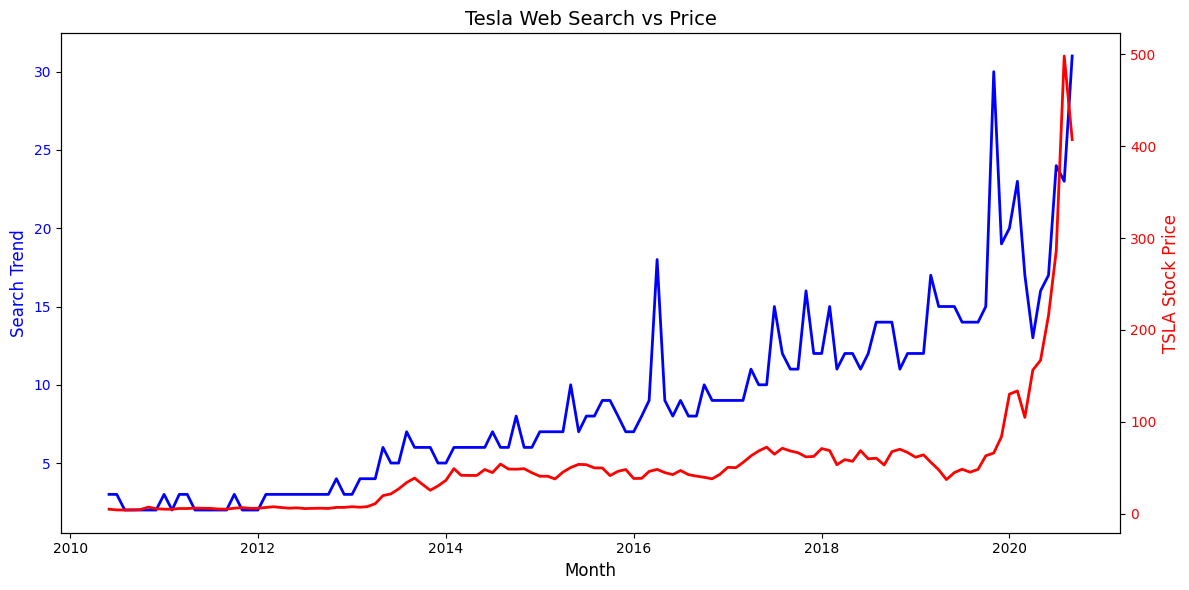

In [208]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot search volume on the first y-axis
ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], color='blue', linewidth=2)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Search Trend', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for stock price
ax2 = ax1.twinx()
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='red', linewidth=2)
ax2.set_ylabel('TSLA Stock Price', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Tesla Web Search vs Price', fontsize=14)
fig.tight_layout()
plt.show()

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

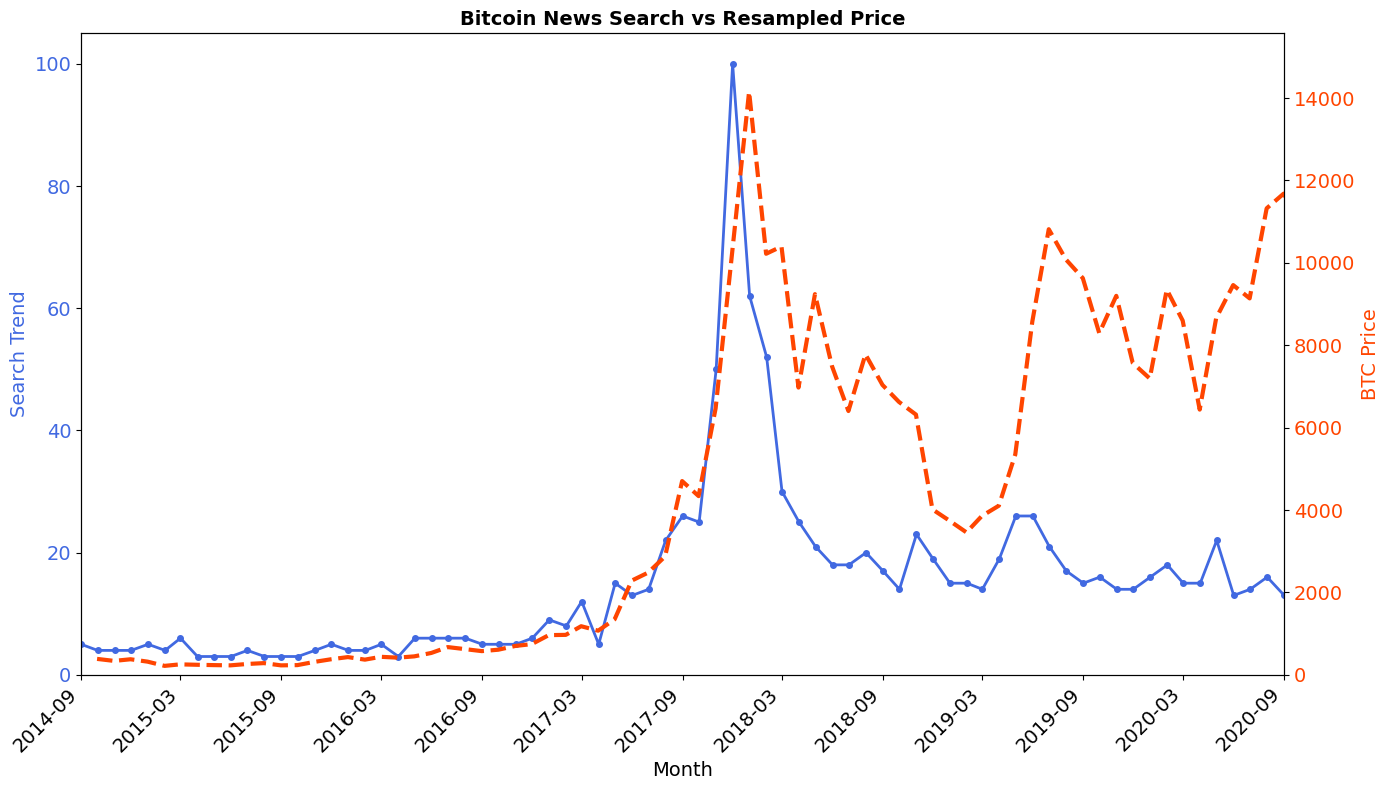

Observation: The Bitcoin price shows significant volatility and peaks around 2017-2018 and mid-2020,
while the search volume is more moderate. Big price increases don't always correlate with big search increases.


In [209]:
fig, ax1 = plt.subplots(figsize=(14, 8), dpi=100)

# Plot search volume on the first y-axis
ax1.plot(df_btc_search['MONTH'], df_btc_search['BTC_NEWS_SEARCH'], color='royalblue', linewidth=2, marker='o', markersize=4, label='BTC News Search')
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Search Trend', fontsize=14, color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

# Create second y-axis for BTC price
ax2 = ax1.twinx()
ax2.plot(df_btc_monthly['MONTH'], df_btc_monthly['CLOSE'], color='#FF4500', linewidth=3, linestyle='--', label='BTC Price')
ax2.set_ylabel('BTC Price', fontsize=14, color='#FF4500')
ax2.tick_params(axis='y', labelcolor='#FF4500', labelsize=14)

# Format x-axis
ax1.xaxis.set_major_locator(date_locator)
ax1.xaxis.set_major_formatter(date_formatter)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Set axis limits
ax1.set_xlim(df_btc_search['MONTH'].min(), df_btc_search['MONTH'].max())
ax1.set_ylim(0, df_btc_search['BTC_NEWS_SEARCH'].max() + 5)
ax2.set_ylim(0, df_btc_monthly['CLOSE'].max() * 1.1)

plt.title('Bitcoin News Search vs Resampled Price', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

# Analysis: Were big increases in searches accompanied by big increases in price?
print("Observation: The Bitcoin price shows significant volatility and peaks around 2017-2018 and mid-2020,")
print("while the search volume is more moderate. Big price increases don't always correlate with big search increases.")

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

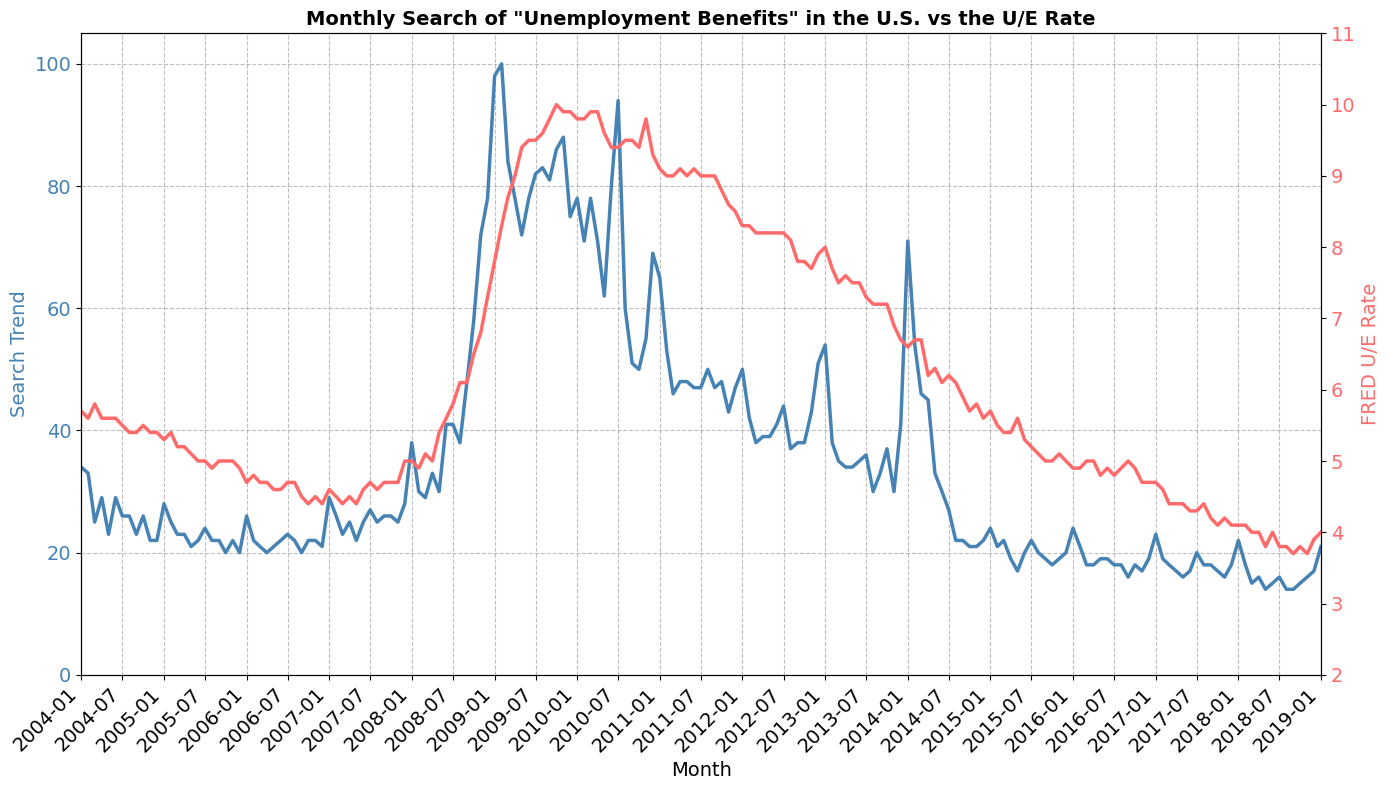

Observation: There appears to be seasonality in the search data.
Search volume tends to spike at the beginning of the year (January-March)
and shows cyclical patterns throughout the year.


In [210]:
fig, ax1 = plt.subplots(figsize=(14, 8), dpi=100)

# Plot search volume on the first y-axis
ax1.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_WEB_SEARCH'], color='steelblue', linewidth=2.5)
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Search Trend', fontsize=14, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

# Create second y-axis for unemployment rate
ax2 = ax1.twinx()
ax2.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], color='#FF6B6B', linewidth=2.5)
ax2.set_ylabel('FRED U/E Rate', fontsize=14, color='#FF6B6B')
ax2.tick_params(axis='y', labelcolor='#FF6B6B', labelsize=14)

# Format x-axis
ax1.xaxis.set_major_locator(date_locator)
ax1.xaxis.set_major_formatter(date_formatter)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add grey grid with dashes
ax1.grid(True, color='grey', linestyle='--', alpha=0.5)

# Set axis limits
ax1.set_xlim(df_unemployment['MONTH'].min(), df_unemployment['MONTH'].max())
ax1.set_ylim(0, df_unemployment['UE_BENEFITS_WEB_SEARCH'].max() + 5)
ax2.set_ylim(2, df_unemployment['UNRATE'].max() + 1)

plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

# Analysis of seasonality
print("Observation: There appears to be seasonality in the search data.")
print("Search volume tends to spike at the beginning of the year (January-March)")
print("and shows cyclical patterns throughout the year.")

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


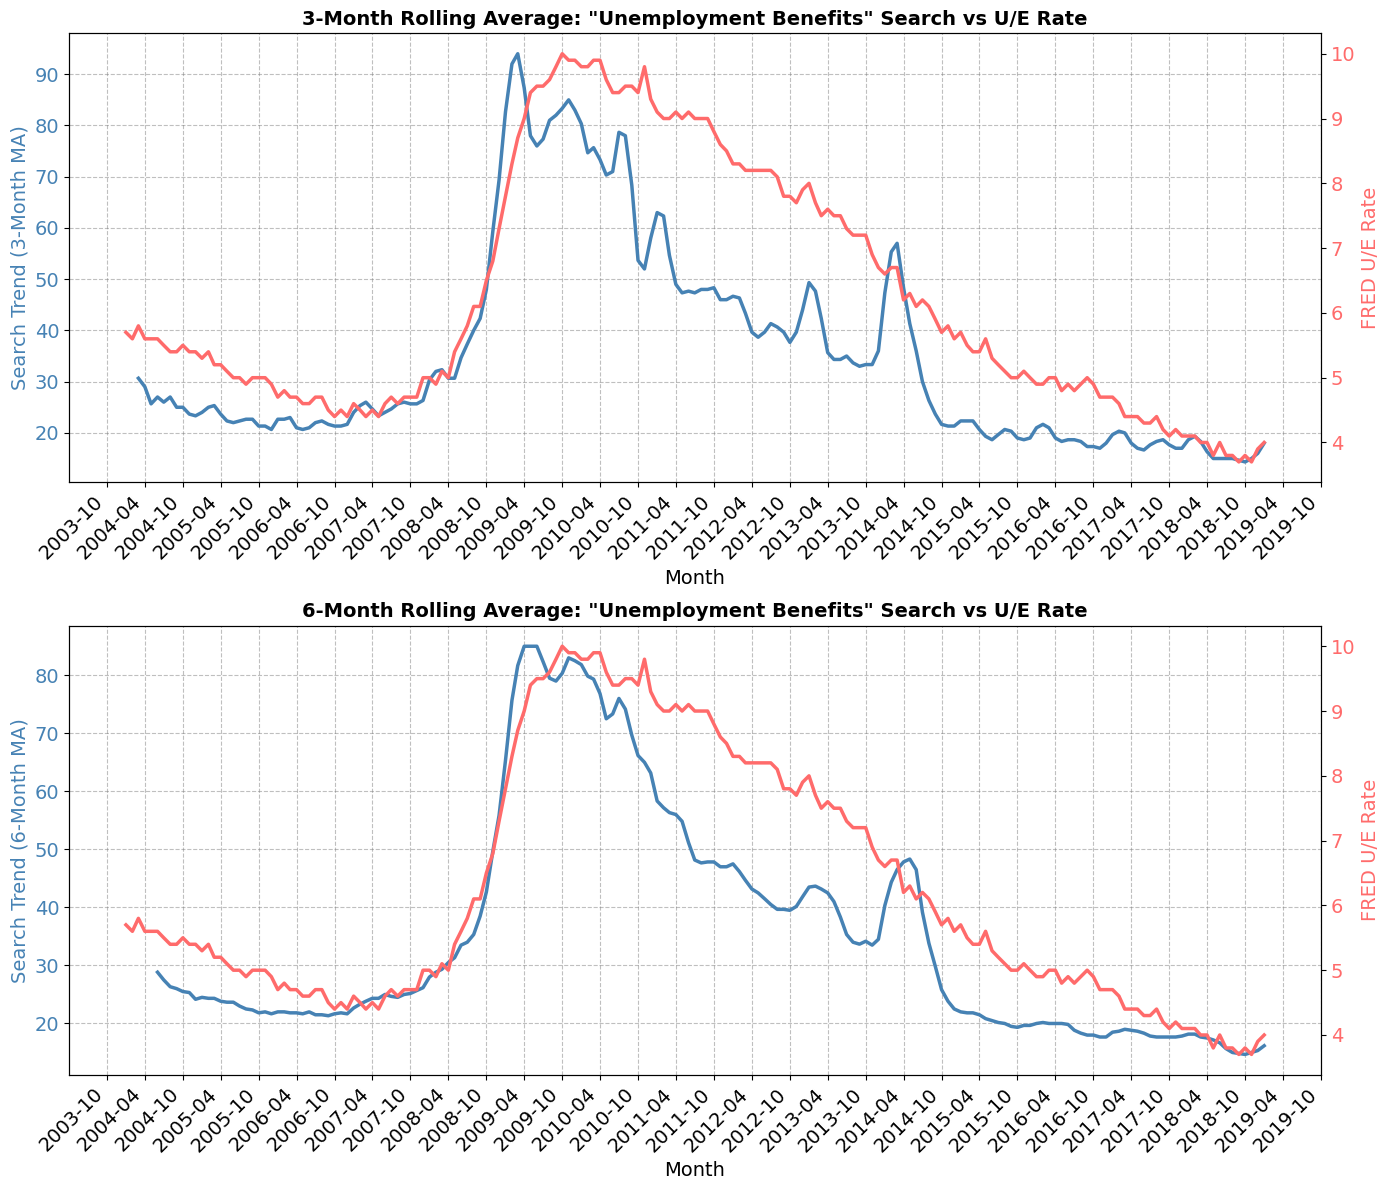

Observation: The rolling averages smooth out noise in the search data.
The 6-month rolling average shows a clearer trend and appears to lead or closely follow the unemployment rate.
During economic downturns (2008-2009, 2020), both search volume and unemployment rate increase together.


In [211]:
# Calculate rolling averages for unemployment benefits web search
df_unemployment['UE_BENEFITS_3M_MA'] = df_unemployment['UE_BENEFITS_WEB_SEARCH'].rolling(window=3).mean()
df_unemployment['UE_BENEFITS_6M_MA'] = df_unemployment['UE_BENEFITS_WEB_SEARCH'].rolling(window=6).mean()

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), dpi=100)

# --- 3-Month Rolling Average ---
ax1_twin1 = ax1.twinx()
ax1.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_3M_MA'], color='steelblue', linewidth=2.5, label='3-Month MA Search')
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Search Trend (3-Month MA)', fontsize=14, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

ax1_twin1.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], color='#FF6B6B', linewidth=2.5, label='UNRATE')
ax1_twin1.set_ylabel('FRED U/E Rate', fontsize=14, color='#FF6B6B')
ax1_twin1.tick_params(axis='y', labelcolor='#FF6B6B', labelsize=14)

ax1.xaxis.set_major_locator(date_locator)
ax1.xaxis.set_major_formatter(date_formatter)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax1.grid(True, color='grey', linestyle='--', alpha=0.5)
ax1.set_title('3-Month Rolling Average: "Unemployment Benefits" Search vs U/E Rate', fontsize=14, fontweight='bold')

# --- 6-Month Rolling Average ---
ax2_twin1 = ax2.twinx()
ax2.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_6M_MA'], color='steelblue', linewidth=2.5, label='6-Month MA Search')
ax2.set_xlabel('Month', fontsize=14)
ax2.set_ylabel('Search Trend (6-Month MA)', fontsize=14, color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue', labelsize=14)
ax2.tick_params(axis='x', labelsize=14)

ax2_twin1.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], color='#FF6B6B', linewidth=2.5, label='UNRATE')
ax2_twin1.set_ylabel('FRED U/E Rate', fontsize=14, color='#FF6B6B')
ax2_twin1.tick_params(axis='y', labelcolor='#FF6B6B', labelsize=14)

ax2.xaxis.set_major_locator(date_locator)
ax2.xaxis.set_major_formatter(date_formatter)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax2.grid(True, color='grey', linestyle='--', alpha=0.5)
ax2.set_title('6-Month Rolling Average: "Unemployment Benefits" Search vs U/E Rate', fontsize=14, fontweight='bold')

fig.tight_layout()
plt.show()

# Analysis
print("Observation: The rolling averages smooth out noise in the search data.")
print("The 6-month rolling average shows a clearer trend and appears to lead or closely follow the unemployment rate.")
print("During economic downturns (2008-2009, 2020), both search volume and unemployment rate increase together.")

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

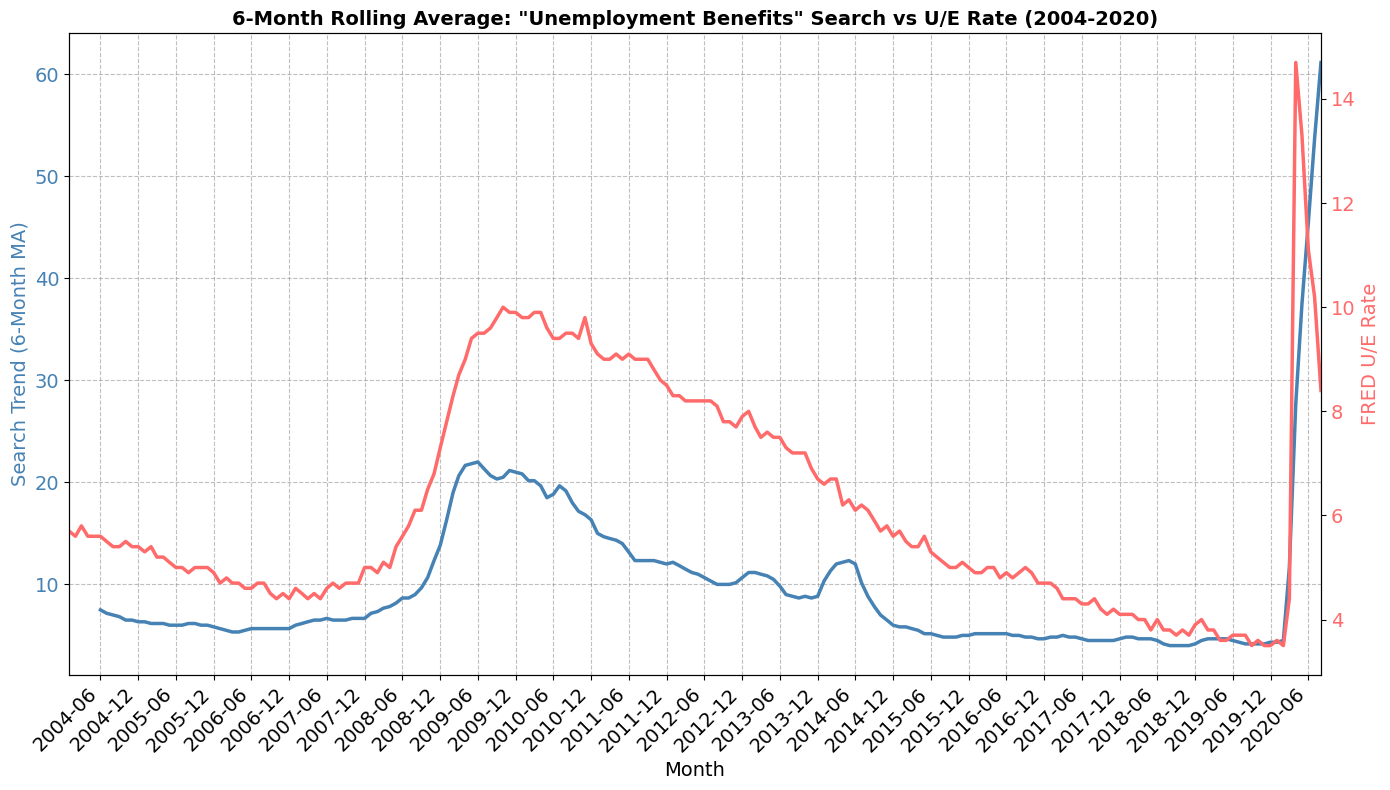

Observation: Including 2020 data shows a dramatic spike in both search volume and unemployment rate
during the COVID-19 pandemic (March-April 2020). This is much more pronounced than previous economic events,
indicating unprecedented search interest in unemployment benefits during this crisis.


In [212]:
# Read the 2004-2020 unemployment data
df_unemployment_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

# Convert MONTH column to Pandas Datetime objects
df_unemployment_2020['MONTH'] = pd.to_datetime(df_unemployment_2020['MONTH'])

# Calculate rolling averages
df_unemployment_2020['UE_BENEFITS_6M_MA'] = df_unemployment_2020['UE_BENEFITS_WEB_SEARCH'].rolling(window=6).mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 8), dpi=100)

# Plot search volume on the first y-axis
ax1.plot(df_unemployment_2020['MONTH'], df_unemployment_2020['UE_BENEFITS_6M_MA'], color='steelblue', linewidth=2.5, label='6-Month MA Search')
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Search Trend (6-Month MA)', fontsize=14, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

# Create second y-axis for unemployment rate
ax2 = ax1.twinx()
ax2.plot(df_unemployment_2020['MONTH'], df_unemployment_2020['UNRATE'], color='#FF6B6B', linewidth=2.5, label='UNRATE')
ax2.set_ylabel('FRED U/E Rate', fontsize=14, color='#FF6B6B')
ax2.tick_params(axis='y', labelcolor='#FF6B6B', labelsize=14)

# Format x-axis
ax1.xaxis.set_major_locator(date_locator)
ax1.xaxis.set_major_formatter(date_formatter)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add grid
ax1.grid(True, color='grey', linestyle='--', alpha=0.5)

# Set axis limits
ax1.set_xlim(df_unemployment_2020['MONTH'].min(), df_unemployment_2020['MONTH'].max())

plt.title('6-Month Rolling Average: "Unemployment Benefits" Search vs U/E Rate (2004-2020)', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

# Analysis
print("Observation: Including 2020 data shows a dramatic spike in both search volume and unemployment rate")
print("during the COVID-19 pandemic (March-April 2020). This is much more pronounced than previous economic events,")
print("indicating unprecedented search interest in unemployment benefits during this crisis.")